In [38]:
import numpy as np
import matplotlib.pyplot as plt

file_path = "DSB Mixers 7.1/sample_freq:2500000.0_RF:570000.0_LO:600000.0.npz"  # Change this to your actual file path
data = np.load(file_path, allow_pickle=True)  # allow_pickle=True in case of nested structures

# **Step 3: Extract and check the data**
all_data = []
key = 'arr_0'
for key in data.files:
    array = data[key]
    
    if isinstance(array, np.ndarray):
        all_data.extend(array.ravel())  # Flatten to 1D if necessary

all_data = np.array(all_data, dtype=float)  # Convert to a single numeric array

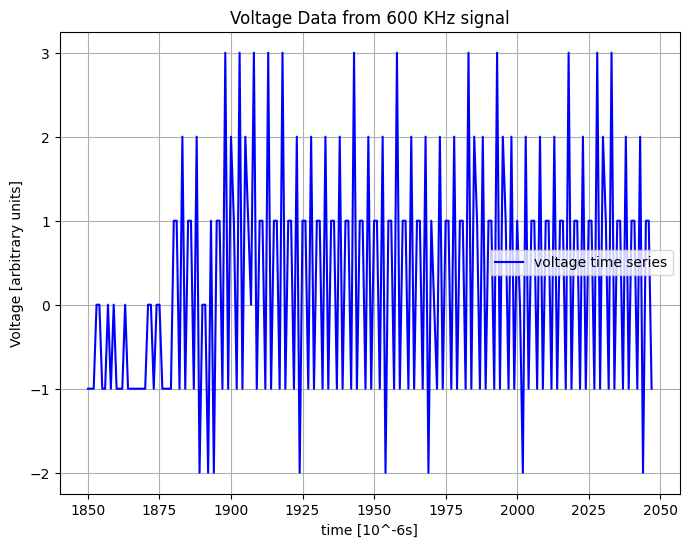

In [17]:
#Plotting for 5.2
x_values = np.arange(len(all_data))  # Default x-values (indices)

mask = (x_values >= 1850) & (x_values <= 2100)
x_trimmed = x_values[mask]
y_trimmed = all_data[mask]

# **Step 5: Plot the data**
plt.figure(figsize=(8, 6))
plt.plot(x_trimmed, y_trimmed, linestyle='-', color='b', label="voltage time series")

plt.xlabel("time [10^-6s]")
plt.ylabel("Voltage [arbitrary units]")
plt.title(f"Voltage Data from 600 KHz signal")
plt.legend()
plt.grid(True)
plt.savefig("1000000.0_600000.0_filtereddata.png", dpi=300, bbox_inches='tight')
plt.show()


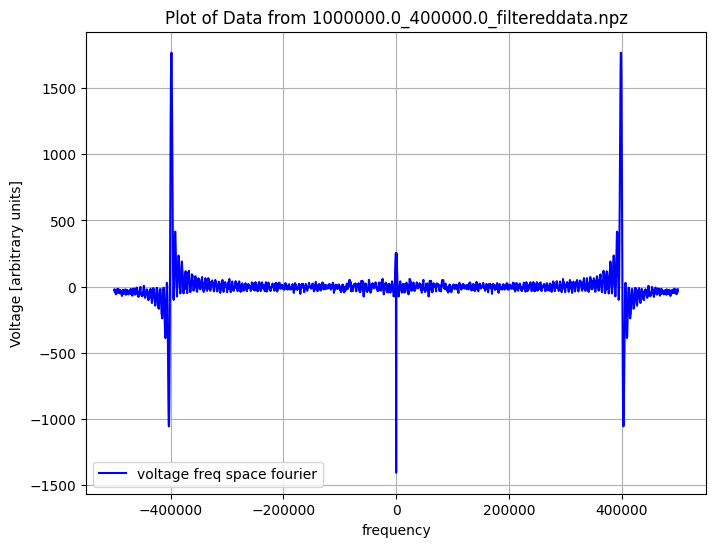

In [46]:
#Plotting for 5.3: fourier of voltage vs freq
freq = 1e6
n = 2048
timestep = 1 /freq
x_axis  = np.fft.fftshift(np.fft.fftfreq(n, d=timestep))

fourier = np.fft.fftshift(np.fft.fft(all_data))
#fourier = fourier.real

plt.figure(figsize=(8, 6))
plt.plot(x_axis, fourier, linestyle='-', color='b', label="voltage freq space fourier")

plt.xlabel("frequency")
plt.ylabel("Voltage [arbitrary units]")
plt.title(f"Plot of Data from {file_path.split('/')[-1]}")
plt.legend()
plt.grid(True)
plt.show()


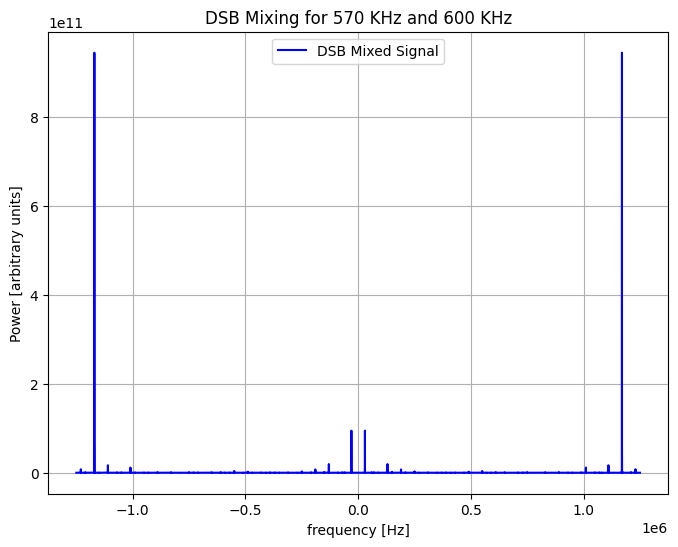

In [42]:
#Plotting for 5.3: fourier of power vs freq
freq = 2.5e6
n = 20480
timestep = 1 /freq
x_axis  = np.fft.fftshift(np.fft.fftfreq(n, d=timestep))

fourier_voltage = np.fft.fft(all_data)
fourier_power = np.abs(fourier_voltage)**2
fourier = np.fft.fftshift(fourier_power)

plt.figure(figsize=(8, 6))
plt.plot(x_axis, fourier, linestyle='-', color='b', label="DSB Mixed Signal")

plt.xlabel("frequency [Hz]")
plt.ylabel("Power [arbitrary units]")
plt.title(f"DSB Mixing for 570 KHz and 600 KHz")
plt.legend()
plt.grid(True)
plt.savefig("DSB MIX.png", dpi=300, bbox_inches='tight')
plt.show()

In [49]:
#Plotting for 5.4: Leakage Power vs freq

freq = 1e6
N= 30000
f = np.linspace(0, freq/2, num =N, endpoint = False)

fourier_voltage = ugradio.dft.dft(all_data,f=f,vsamp=freq)
fourier_power = fourier_voltage[1]*np.conj(fourier_voltage[1])

plt.figure(figsize=(8, 6))
plt.plot(fourier_voltage[0], fourier_power, linestyle='-', color='b', label="power spectrum")

plt.xlabel("frequency")
plt.ylabel("Power [arbitrary units]")
plt.title(f"Plot of Data from {file_path.split('/')[-1]}")
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'ugradio' is not defined

In [ ]:
#Plotting for 5.5: Frequency Resolution

freq = 1e6
N= 30000
f = np.linspace(0, freq/2, num =N, endpoint = False)

n = 2048
timestep = 1 /freq
x_axis  = np.fft.fftshift(np.fft.fftfreq(n, d=timestep))

fourier_voltage = ugradio.dft.dft(all_data,f=f,vsamp=freq)
fourier_power = fourier_voltage[1]*np.conj(fourier_voltage[1])

plt.figure(figsize=(8, 6))
plt.plot(x_axis, fourier_power, linestyle='-', color='b', label="power spectrum")

plt.xlabel("frequency")
plt.ylabel("Power [arbitrary units]")
plt.title(f"Plot of Data from {file_path.split('/')[-1]}")
plt.legend()
plt.grid(True)
plt.show()

